In [75]:
import pandas as pd
import re
import matplotlib.pyplot as plt

#Read the data from csv into dataframe
LGA_INFO = pd.read_csv('Data/LGA_2016_VIC.csv')
LGA_SPORT_FACILITY = pd.read_csv('Data/Victoria_Sport_and_Recreation_Facility_Location.csv')
LGA_HEALTH_RISK = pd.read_csv('Data/LGA_Adults_Health Risk_Factor_Estimates.csv')

#Cleaning area name and corresponding area code, and make a dictionary
LGA_NAME_TO_CODE = LGA_INFO[['LGA_CODE_2016', 'LGA_NAME_2016']]
LGA_NAME_TO_CODE = LGA_NAME_TO_CODE.drop_duplicates()
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.replace(r' \([^()]*\)', '', regex=True)
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.upper()
LGA_DIC = LGA_NAME_TO_CODE.set_index('LGA_NAME_2016')['LGA_CODE_2016'].to_dict()

#Find the corresponding area codes for the sport facilities
area_code = LGA_SPORT_FACILITY['lga'].to_list()
for i in range(len(area_code)):
    if area_code[i] in LGA_DIC:
        area_code[i] = LGA_DIC[area_code[i]]
    else:
        area_code[i] = None

#Print the area names that does not have a corresponding code
# for i in range(len(area_code)):
#     if area_code[i] == None:
#         print(LGA_SPORT_FACILITY['lga'].to_list()[i])

#Add the area codes and clean the sport facility dataframe
LGA_SPORT_FACILITY['lga_code'] = area_code
LGA_SPORT_FACILITY = LGA_SPORT_FACILITY.dropna(subset=['lga_code'])
LGA_SPORT_FACILITY['lga_code'] = LGA_SPORT_FACILITY['lga_code'].astype(dtype='int')

#Group the sport facilities by area code
FACILITY_COUNT_PER_LGA = LGA_SPORT_FACILITY.groupby('lga_code', as_index=False).count()[['lga_code', 'lga']]
#print(FACILITY_COUNT_PER_LGA)

#Join the sport facility dataframe and health risk dataframe together by lga
JOINED = FACILITY_COUNT_PER_LGA.set_index('lga_code').join(LGA_HEALTH_RISK.set_index('lga_code'), on='lga_code', how='left', sort=False)
# print(JOINED)

# plot1 = JOINED.plot.scatter(x='lga', y='lw_excse_4_asr_uci', c='Blue')
# plot2 = JOINED.plot.scatter(x='lga', y='hbld_pres_2_asr', c='Red')
# plot3 = JOINED.plot.scatter(x='lga', y='ovrwgt_p_2_asr', c='Orange')
# plot4 = JOINED.plot.scatter(x='lga', y='obese_p_2_asr', c='Green')

#Read region population csv
region_population = pd.read_csv('Data/regional_population_csv.csv')

#Join region_population dataframe and JOINED together by lga code
JOINED_2 = JOINED.join(region_population.set_index('lga_code'), on='lga_code', how='left', sort=False)
JOINED_2['num_facility_per_capita(2016)']=JOINED_2['lga']/JOINED_2['population2016']
JOINED_2['num_facility_per_capita(2017)']=JOINED_2['lga']/JOINED_2['population2017']
JOINED_2['num_facility_per_km2']=JOINED_2['lga']/JOINED_2['Area(km2)']



Coefficients:  [-2.30756254]

Intercept:  72.55942620626215

Coefficient of determination: 0.40


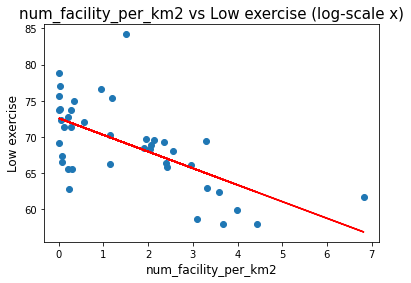

In [85]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['lw_excse_4_asr_uci']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.xscale('log')
plt.title("num_facility_per_km2 vs Low exercise (log-scale x)",fontsize=15)
plt.ylabel("Low exercise",fontsize=12)
plt.xlabel("num_facility_per_km2",fontsize=12)
plt.savefig("num_facility_per_km2 vs Low exercise (log-scale x)")

Coefficients:  [-3.15059103]

Intercept:  30.698871569784956

Coefficient of determination: 0.70


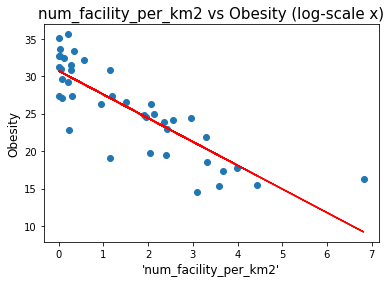

In [86]:
X = JOINED_2[['num_facility_per_km2']]
y = JOINED_2['obese_p_2_asr']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_predictions = lm.predict(X)

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

r2_train = lm.score(X, y)
print('Coefficient of determination: {0:.2f}'.format(r2_train))

plt.scatter(X, y)
plt.plot(X, y_predictions, color='red')
plt.xscale('log')
plt.title("num_facility_per_km2 vs Obesity (log-scale x)",fontsize=15)
plt.ylabel("Obesity",fontsize=12)
plt.xlabel("'num_facility_per_km2'",fontsize=12)
plt.savefig("num_facility_per_km2 vs Obesity (log-scale x)")